In [274]:
import random
import math
from matplotlib import pyplot as plt 
import numpy as np

from abc import abstractmethod, ABCMeta

In [298]:
class ParamsOptimizer():

    x1 = 0
    x2 = 0
    x3 = 0
    class_list = ["music", "speach", "silence"]
    class_params = {el: {"freq_b": [1750,], "freq_t": [8500,], "dur": [20,], "reward": 0, "freq_b_grad": 0, "freq_t_grad": 0, "dur_grad": 0, "freq_b_step": 10000, "freq_t_step": 10000, "dur_step": 10000, "param_n": 0} for el in class_list} 
    rate = 10000
    0
    target = -1 # min

    @staticmethod
    def __limit_value(value, min_value = 0, max_value = 20000):
        if value > max_value:
            return max_value
        elif value < min_value:
            return min_value
        return value


    def make_step(self, sound_type, new_reward):
        params = self.class_params[sound_type]

        if not params["reward"]:
            params["reward"] = new_reward
            params["freq_b"].append(self.__limit_value(params["freq_b"][-1] + params["freq_b_step"], max_value=20000))
            return
            
        if params["param_n"] % 3 == 0:
            params["freq_b_grad"] = self.target*(new_reward - params["reward"])
            params["freq_b"].pop()
            params["freq_t"].append(self.__limit_value(params["freq_t"][-1] + params["freq_t_step"], max_value=20000))
            # nextX = self.x - self.learningRate * self.gradient(self.x)
        elif params["param_n"] % 3 == 1:
            params["freq_t_grad"] = self.target*(new_reward - params["reward"])
            params["freq_t"].pop()
            params["dur"].append(self.__limit_value(params["dur"][-1] + params["dur_step"], max_value=975))
        elif params["param_n"] % 3 == 2:
            params["dur_grad"] = self.target*(new_reward - params["reward"])
            params["dur"].pop()

            print("/________________________________________________________________/")
            print("Step values: ", params["freq_b_step"], params["freq_t_step"], params["dur_step"])
            print("Grad: ", params["freq_b_grad"], params["freq_t_grad"], params["dur_grad"])
            print("Target: ", self.x1, self.x2, self.x3)

            params["freq_b"].append(self.__limit_value(params["freq_b"][-1] + self.rate*params["freq_b_grad"], max_value=20000))
            params["freq_t"].append(self.__limit_value(params["freq_t"][-1] + self.rate*params["freq_t_grad"], max_value=20000))
            params["dur"].append(self.__limit_value(params["dur"][-1] + self.rate*params["dur_grad"], max_value=200))

        
            # params["freq_b"].append(self.__limit_value(params["freq_b"][-1] + params["freq_b_step"] * np.sign(params["freq_b_grad"]), max_value=20000))
            # params["freq_t"].append(self.__limit_value(params["freq_t"][-1] + params["freq_t_step"] * np.sign(params["freq_t_grad"]), max_value=20000))
            # params["dur"].append(self.__limit_value(params["dur"][-1] + params["dur_step"] * np.sign(params["dur_grad"]), max_value=200))


            print("New params: ", params["freq_b"][-1], params["freq_t"][-1], params["dur"][-1])
            
            if params["freq_b_grad"] < 0:
                params["freq_b_step"] /= 2
            if params["freq_t_grad"] < 0:
                params["freq_t_step"] /= 2
            if params["dur_grad"] < 0:
                params["dur_step"] /= 2


            params["reward"] = 0

        params["param_n"] = params["param_n"] + 1
    

        
        # grad = -(new_reward - params["reward"][-1])
        # params["reward"].append(new_reward)

        # grad_sign = 1 if grad > 0 else -1
        # if grad_sign == -1:
        #     params["direction"] = -params["direction"]
        #     if params["param_n"] % 3 == 0:
        #         params["freq_b_step"] /= 2
        #     if params["param_n"] % 3 == 1:
        #         params["freq_t_step"] /= 2
        #     if params["param_n"] % 3 == 2:
        #         params["dur_step"] /= 2
        
        # if params["param_n"] % 3 == 2:
        #     params["freq_b"].append(params["freq_b"][-1] + params["freq_b_step"])
        # elif params["param_n"] % 3 == 0:
        #     params["freq_t"].append(params["freq_t"][-1] + params["freq_t_step"])
        # elif params["param_n"] % 3 == 1:
        #     params["dur"].append(params["dur"][-1] + params["dur_step"])

    def analyze(self, sound_type, reward=None):
        params = self.class_params[sound_type]
        reward = reward or math.sqrt((params["freq_b"][-1]-self.x1)**2+(params["freq_t"][-1]-self.x2)**2+(params["dur"][-1]-self.x3)**2) / 50000 * 3  + random.random()*0.1

        self.make_step(sound_type, reward)
        return reward
  


In [299]:

optimizer = ParamsOptimizer()
optimizer.x1 = 4000
optimizer.x2 = 17000
optimizer.x3 = 120
for i in range(212):
    optimizer.analyze("music")
    # if i % 9 == 2:
        # optimizer.class_params["music"]["param_n"] = optimizer.class_params["music"]["param_n"] + 1
    # if i % 27 == 2 and i // 27 >= 1:
    #     optimizer.class_params["music"]["freq_b_step"] = 512
    #     optimizer.class_params["music"]["freq_t_step"] = 512
    #     optimizer.class_params["music"]["dur_step"] = 128

/________________________________________________________________/
Step values:  10000 10000 10000
Grad:  -0.16858525806867664 0.29046480987095186 -0.018610383769305572
Target:  4000 17000 120
New params:  64.14741931323374 11404.648098709518 0
/________________________________________________________________/
Step values:  5000.0 10000 5000.0
Grad:  0.00027823246122016254 0.09294814536307555 -0.03024783266020714
Target:  4000 17000 120
New params:  66.92974392543536 12334.129552340273 0
/________________________________________________________________/
Step values:  5000.0 10000 2500.0
Grad:  0.02244228021378919 0.0819975516344752 -0.029652232870104267
Target:  4000 17000 120
New params:  291.3525460633273 13154.105068685025 0
/________________________________________________________________/
Step values:  5000.0 10000 1250.0
Grad:  0.009772148127405178 0.016030686764912316 -0.036012373308202617
Target:  4000 17000 120
New params:  389.07402733737905 13314.411936334149 0
/____________

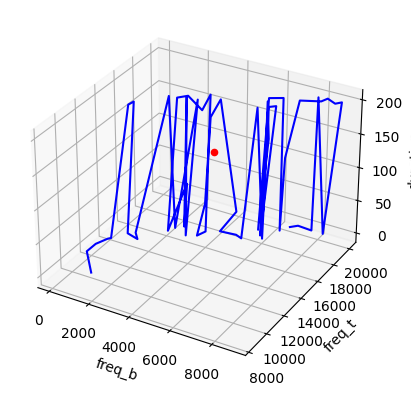

In [300]:
def draw(x1_hist, x2_hist, x3_hist, x1, x2, x3):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot3D(x1_hist, x2_hist, x3_hist, 'b')
    ax.set_xlabel('freq_b')
    ax.set_ylabel('freq_t')
    ax.set_zlabel('duration')
    
    ax.scatter(x1, x2, x3, c='red')
    return plt.show()

draw(optimizer.class_params["music"]["freq_b"][:64], optimizer.class_params["music"]["freq_t"][:64], optimizer.class_params["music"]["dur"][:64], optimizer.x1, optimizer.x2, optimizer.x3)

In [543]:
class ParamsOptimizer:
    x1 = 0
    x2 = 0
    x3 = 0
    class_list = ["music", "speach", "silence"]
    class_params = {el: {"freq_b": [1750,], "freq_t": [8500,], "dur": [20,], "reward": 0, "freq_b_grad": 0, "freq_t_grad": 0, "dur_grad": 0, "freq_b_step": 100, "freq_t_step": 100, "dur_step": 10, "direction": 1, "param_n": 0} for el in class_list} 


    def make_step(self, sound_type, new_reward):
        params = self.class_params[sound_type]

        if not params["reward"]:
            params["reward"] = new_reward
            params["freq_b"].append(params["freq_b"][-1] + params["freq_b_step"])
            return
            
        if params["param_n"] % 3 == 0:
            params["freq_b_grad"] = -(new_reward - params["reward"])
            params["freq_b"].pop()
            params["freq_t"].append(params["freq_t"][-1] + params["freq_t_step"])
        elif params["param_n"] % 3 == 1:
            params["freq_t_grad"] = -(new_reward - params["reward"])
            params["freq_t"].pop()
            params["dur"].append(params["dur"][-1] + params["dur_step"])
        elif params["param_n"] % 3 == 2:
            params["dur_grad"] = -(new_reward - params["reward"])
            params["dur"].pop()

            print(params["freq_b_grad"], params["freq_t_grad"], params["dur_grad"])

            direction = np.argmax([params["freq_b_grad"], params["freq_t_grad"], params["dur_grad"]])
            # params["freq_b"].append(params["freq_b"][-1] + 50*params["freq_b_grad"])
            # params["freq_t"].append(params["freq_t"][-1] + 50*params["freq_t_grad"])
            # params["dur"].append(params["dur"][-1] + 10*params["dur_grad"])

            if direction == 0:
                params["freq_b"].append(params["freq_b"][-1] + params["freq_b_step"] * np.sign(params["freq_b_grad"]))
                params["freq_t"].append(params["freq_t"][-1])
                params["dur"].append(params["dur"][-1])
                if params["freq_b_grad"] < 0:
                    params["freq_b_step"] /= 2
            elif direction == 1:
                params["freq_t"].append(params["freq_t"][-1] + params["freq_t_step"] * np.sign(params["freq_t_grad"]))
                params["freq_b"].append(params["freq_b"][-1])
                params["dur"].append(params["dur"][-1])
                if params["freq_t_grad"] < 0:
                    params["freq_t_step"] /= 2
            elif direction == 2:
                params["dur"].append(params["dur"][-1] + params["dur_step"] * np.sign(params["dur_grad"]))
                params["freq_t"].append(params["freq_t"][-1])
                params["freq_b"].append(params["freq_b"][-1])
                if params["dur_grad"] < 0:
                    params["dur_step"] /= 2

            print(params["freq_b"][-1], params["freq_t"][-1], params["dur"][-1])
            

            params["reward"] = 0

        params["param_n"] = params["param_n"] + 1
    

        
        # grad = -(new_reward - params["reward"][-1])
        # params["reward"].append(new_reward)

        # grad_sign = 1 if grad > 0 else -1
        # if grad_sign == -1:
        #     params["direction"] = -params["direction"]
        #     if params["param_n"] % 3 == 0:
        #         params["freq_b_step"] /= 2
        #     if params["param_n"] % 3 == 1:
        #         params["freq_t_step"] /= 2
        #     if params["param_n"] % 3 == 2:
        #         params["dur_step"] /= 2
        
        # if params["param_n"] % 3 == 2:
        #     params["freq_b"].append(params["freq_b"][-1] + params["freq_b_step"])
        # elif params["param_n"] % 3 == 0:
        #     params["freq_t"].append(params["freq_t"][-1] + params["freq_t_step"])
        # elif params["param_n"] % 3 == 1:
        #     params["dur"].append(params["dur"][-1] + params["dur_step"])

    def analyze(self, sound_type, reward=None):
        params = self.class_params[sound_type]
        reward = reward or math.sqrt((params["freq_b"][-1]-self.x1)**2+(params["freq_t"][-1]-self.x2)**2+(params["dur"][-1]-self.x3)**2)

        self.make_step(sound_type, reward)  
        return reward
  